# ROC curve comparison PyMC3, susie, varbvs, logit
ROC curve for comparing methods, susie calibrate

In [1]:
import pandas as pd, numpy as np
import os
from collections import Counter
cwd = os.path.expanduser("/home/min/GIT/cnv-gene-mapping/data/deletion_simu_30_shape0.777_scale0.843")
n = 30

## block 30

In [2]:
varbvs = pd.read_csv(f"{cwd}/deletion.genes.block{n}.for_simu.sample.combined.genes.varbvs.all.blocks.pip.csv", header = None, names = ["varbvs_pip"])
susie = pd.read_csv(f"{cwd}/deletion.genes.block{n}.for_simu.sample.combined.genes.SuSiE.L_10.all.blocks.pip.csv", header = None, names = ["susie_pip"])
logit3 = pd.read_csv(f"{cwd}/deletion.genes.block{n}.for_simu.sample.combined.genes.logit.all.blocks.pip.regional.notruncated.csv", header = None, names = ["logit_pip3"])
logit2 = pd.read_csv(f"{cwd}/deletion.genes.block{n}.for_simu.sample.combined.genes.logit.all.blocks.pip.regional.csv", header = None, names = ["logit_pip2"])
logit = pd.read_csv(f"{cwd}/deletion.genes.block{n}.for_simu.sample.combined.genes.logit.all.blocks.pip.csv", header = None, names = ["logit_pip"])
pymc3 = pd.read_csv(f"{cwd}/deletion.genes.block{n}.for_simu.sample.combined.genes.pymc3.chain_5.all.blocks.uniform.multi_seeds.pip.gz", header = None, compression = "gzip", names = ["pymc3"])

In [3]:
fisher = pd.read_csv(f"{cwd}/deletion.genes.block{n}.for_simu.sample.combined.genes.block1.fisher.gz", header = 0, sep = "\t")

In [4]:
fisher["id"] = [int(x.split("_")[1]) for x in fisher["gene"]]

In [5]:
fisher = fisher.sort_values(by = ["id"])

In [6]:
fisher = fisher.set_index([[i for i in range(fisher.shape[0])]])

In [7]:
fisher = fisher[["p"]]

In [8]:
beta = pd.read_csv(f"{cwd}/deletion.genes.block{n}.for_simu.block30.shape0.777.scale0.843.beta", header = None, names = ["beta"])
index = pd.read_csv(f"{cwd}/deletion.genes.block{n}.for_simu.sample.combined.block1.forsimu.index.csv", header = None, names = ["s", "e"], sep = '\t')

## Drawing

In [9]:
b1 = list()
for i, x in index.iterrows():
    b1.extend([j for j in range(x["s"], x["e"]+1)])

In [10]:
beta = beta.iloc[b1]
beta = beta.set_index([[i for i in range(beta.shape[0])]])

In [11]:
res = pd.concat([beta, varbvs, susie, logit3, logit2, logit, pymc3, fisher], axis = 1)

In [12]:
res["is_signal"] = res["beta"].apply(lambda x: 1 if x != 0 else 0)

In [13]:
res.head(10)

,beta,varbvs_pip,susie_pip,logit_pip3,logit_pip2,logit_pip,pymc3,p,is_signal
0,0.000000,0.054222,0.0,0.015036,0.015036,0.125,0.0174,0.790466,0
1,0.000000,0.054220,0.0,0.015036,0.015036,0.125,0.0139,0.790466,0
2,0.000000,0.054217,0.0,0.015036,0.015036,0.125,0.0174,0.790466,0
3,0.000000,0.054216,0.0,0.015036,0.015036,0.125,0.0168,0.790466,0
4,0.552649,0.054214,0.0,0.015036,0.015036,0.125,0.0190,0.790466,1
5,0.000000,0.054212,0.0,0.015036,0.015036,0.125,0.0184,0.790466,0
6,0.000000,0.054211,0.0,0.015036,0.015036,0.125,0.0145,0.790466,0
7,-0.000000,0.054210,0.0,0.015036,0.015036,0.125,0.0172,0.790466,0
8,0.000000,0.048647,0.0,0.015036,0.015036,0.100,0.0168,0.790466,0
9,0.000000,0.048647,0.0,0.015036,0.015036,0.100,0.0172,0.790466,0


In [14]:
res.shape

(2290, 9)

In [15]:
calib = res[["varbvs_pip", "susie_pip", "logit_pip3", "logit_pip2", "logit_pip", "pymc3", "is_signal"]]

In [16]:
cutoffs = [0.01*i for i in range(0,101)]

In [17]:
res1 = pd.DataFrame({"cutoff": cutoffs})

In [18]:
n1 = len(b1)
n2 = sum(res["is_signal"])

In [19]:
n1,  n2

(2290, 112)

In [20]:
res.shape

(2290, 9)

In [21]:
for x in ["varbvs_pip", "susie_pip", "logit_pip3", "logit_pip2", "logit_pip", "pymc3", "p"]:
    res1[f"{x}_FDR"] = [sum(res[x]>i)/n1 for i in cutoffs]
    res1[f"{x}_power"] = [res[(res[x]>i) & (res["is_signal"] == 1)].shape[0]/n2 for i in cutoffs]

In [22]:
res1.head()

,cutoff,varbvs_pip_FDR,varbvs_pip_power,susie_pip_FDR,susie_pip_power,logit_pip3_FDR,logit_pip3_power,logit_pip2_FDR,logit_pip2_power,logit_pip_FDR,logit_pip_power,pymc3_FDR,pymc3_power,p_FDR,p_power
0,0.00,1.000000,1.000000,0.376419,0.669643,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.01,0.956769,0.973214,0.282096,0.660714,0.820087,0.910714,0.820087,0.910714,0.887773,0.928571,0.952402,1.000000,0.827511,0.482143
2,0.02,0.898690,0.946429,0.277293,0.651786,0.499563,0.776786,0.499563,0.776786,0.852402,0.910714,0.682096,0.901786,0.823144,0.482143
3,0.03,0.820524,0.866071,0.253712,0.616071,0.291703,0.589286,0.275546,0.562500,0.805240,0.875000,0.404367,0.750000,0.819214,0.473214
4,0.04,0.709607,0.785714,0.245415,0.598214,0.211790,0.553571,0.189520,0.517857,0.744105,0.848214,0.313974,0.696429,0.800000,0.446429


In [23]:
res1.tail()

,cutoff,varbvs_pip_FDR,varbvs_pip_power,susie_pip_FDR,susie_pip_power,logit_pip3_FDR,logit_pip3_power,logit_pip2_FDR,logit_pip2_power,logit_pip_FDR,logit_pip_power,pymc3_FDR,pymc3_power,p_FDR,p_power
96,0.96,0.012664,0.125000,0.024454,0.071429,0.004803,0.071429,0.003057,0.044643,0.092576,0.116071,0.00262,0.044643,0.258079,0.133929
97,0.97,0.011354,0.116071,0.024454,0.071429,0.004803,0.071429,0.003057,0.044643,0.092576,0.116071,0.00262,0.044643,0.258079,0.133929
98,0.98,0.011354,0.116071,0.024454,0.071429,0.004803,0.071429,0.003057,0.044643,0.092576,0.116071,0.00262,0.044643,0.258079,0.133929
99,0.99,0.010480,0.098214,0.024454,0.071429,0.004803,0.071429,0.003057,0.044643,0.092576,0.116071,0.00262,0.044643,0.258079,0.133929
100,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


In [24]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_prop = font_manager.FontProperties(size=24)

## FDR power curve

WARNING: No handles with labels found to put in legend.

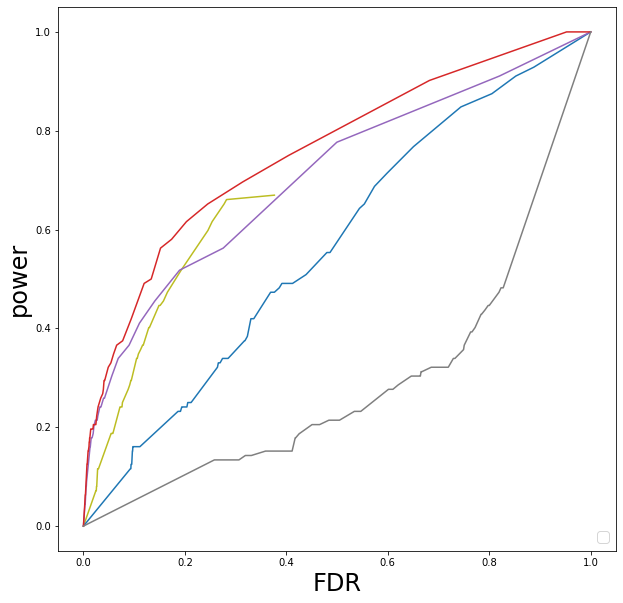

In [25]:
fig, ax = plt.subplots(figsize = (10, 10))
# plt.scatter(res1["varbvs_pip_FDR"], res1["varbvs_pip_power"], c = "C4", label='varbvs')
# plt.plot(res1["varbvs_pip_FDR"], res1["varbvs_pip_power"], c = "C4")

# plt.scatter(res1["susie_pip_FDR"], res1["susie_pip_power"], c = "C8", label='susie')
plt.plot(res1["susie_pip_FDR"], res1["susie_pip_power"], c = "C8")

# plt.scatter(res1["logit_pip_FDR"], res1["logit_pip_power"], c = "C0", label='logit')
plt.plot(res1["logit_pip_FDR"], res1["logit_pip_power"], c = "C0")
# plt.scatter(res1["logit_pip2_FDR"], res1["logit_pip2_power"], c = "C4", label='logit regional PIP')
plt.plot(res1["logit_pip2_FDR"], res1["logit_pip2_power"], c = "C4")

# plt.scatter(res1["logit_pip3_FDR"], res1["logit_pip3_power"], c = "C9", label='logit regional PIP no truncated')
# plt.plot(res1["logit_pip3_FDR"], res1["logit_pip3_power"], c = "C9")

# plt.scatter(res1["pymc3_FDR"], res1["pymc3_power"], c = "C3", label='pymc3 uniform')
plt.plot(res1["pymc3_FDR"], res1["pymc3_power"], c = "C3")

# plt.scatter(res1["p_FDR"], res1["p_power"], c = "C7", label = 'fisher')
plt.plot(res1["p_FDR"], res1["p_power"], c = "C7")

plt.legend(loc = 'lower right', fontsize = 15)
plt.xlabel("FDR", fontproperties=font_prop)
plt.ylabel("power", fontproperties=font_prop)
# plt.savefig("/home/min/GIT/cnv-gene-mapping/data/deletion_simu_30_shape0.777_scale0.843/FDR_power_curve_0515.pdf")
plt.show()

> /home/min/GIT/cnv-gene-mapping/data/deletion_simu/ROC.pdf (16.0 KiB):

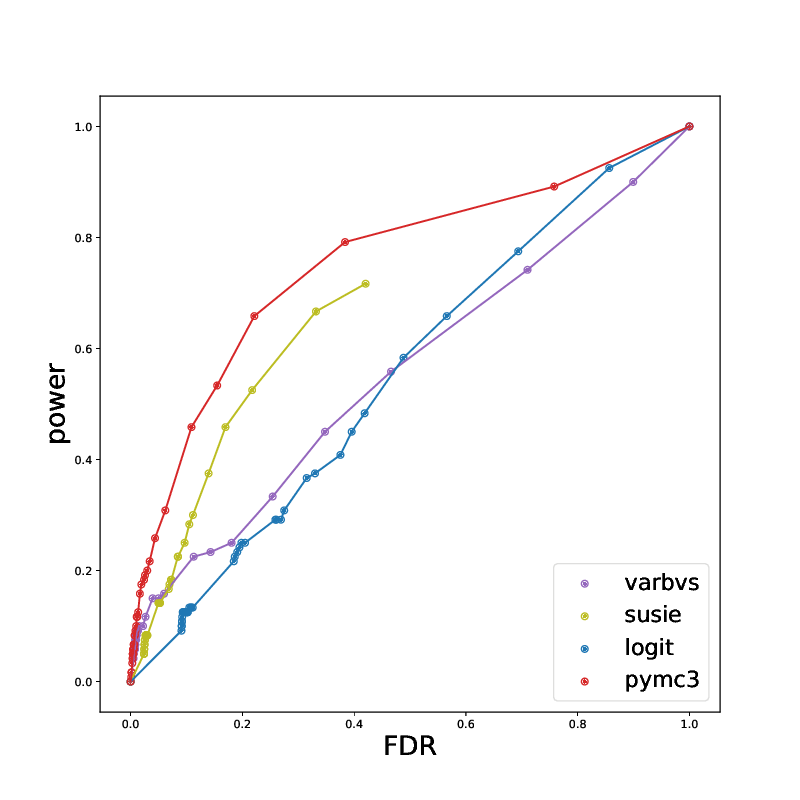

In [21]:
%preview /home/min/GIT/cnv-gene-mapping/data/deletion_simu/ROC.pdf -s png --dpi 80

In [32]:
calib.head()

,varbvs_pip,susie_pip,logit_pip3,logit_pip2,logit_pip,pymc3,is_signal
0,0.054222,0.0,0.015036,0.015036,0.125,0.0174,0
1,0.054220,0.0,0.015036,0.015036,0.125,0.0139,0
2,0.054217,0.0,0.015036,0.015036,0.125,0.0174,0
3,0.054216,0.0,0.015036,0.015036,0.125,0.0168,0
4,0.054214,0.0,0.015036,0.015036,0.125,0.0190,1


In [29]:
%get calib

In [33]:
saveRDS(calib, "/home/min/GIT/cnv-gene-mapping/data/deletion_simu_30_shape0.777_scale0.843/PIP_calib_all_block.rds")

In [28]:
library(ggplot2)
library(cowplot)
library(dplyr)


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [29]:
bin_size = 20
bins = cbind(seq(1:bin_size)/bin_size-1/bin_size, seq(1:bin_size)/bin_size)

In [54]:
pip_cali = list()
for (name in rev(colnames(calib))[-1]) {
    for (i in 1:nrow(bins)) {
        tmp = calib[which(calib[[name]] > bins[i,1] & calib[[name]] < bins[i,2]), ]
        if (is.null(pip_cali[[name]])) pip_cali[[name]] = c(sum(tmp[[name]]), sum(tmp$is_signal), length(tmp$is_signal))
        else pip_cali[[name]] = rbind(pip_cali[[name]], c(sum(tmp[[name]]), sum(tmp$is_signal), length(tmp$is_signal)))
    }
    pip_cali[[name]][which(is.na(pip_cali[[name]]))] = 0
}

In [34]:
get_cali = function(alist, col) { # alist = pip_cali
    res = alist[[col]]
    if (!is.null(alist[[col]])) res = res + alist[[col]]
    res[,c(1,2)] = res[,c(1,2)] / res[,3]
    return(res[-1,])
}

In [35]:
res = get_cali(pip_cali, "logit_pip")

In [43]:
saveRDS(list("susie" = get_cali(pip_cali, 'susie_pip'),
             "logit" = get_cali(pip_cali, 'logit_pip'),
             "logit_regional" = get_cali(pip_cali, 'logit_pip2'),
             "varbvs" = get_cali(pip_cali, 'varbvs_pip'),
             "pymc3" = get_cali(pip_cali, 'pymc3')),
             "/home/min/GIT/cnv-gene-mapping/data/deletion_simu_30_shape0.777_scale0.843/tmp.RDS")

In [44]:
dat = readRDS("/home/min/GIT/cnv-gene-mapping/data/deletion_simu_30_shape0.777_scale0.843/tmp.RDS")

In [45]:
dot_plot = function(dataframe) {
  ggplot(dataframe, aes(x=mean_pip, y=observed_freq)) +
    geom_errorbar(aes(ymin=observed_freq-se, ymax=observed_freq+se), colour="gray", size = 0.2, width=.01) +
    geom_point(size=1.5, shape=21, fill="#002b36") + # 21 is filled circle
    xlab("Mean PIP") +
    ylab("Observed frequency") +
    coord_cartesian(ylim=c(0,1), xlim=c(0,1)) +
    geom_abline(slope=1,intercept=0,colour='red', size=0.2) +
    ggtitle(name) +
    expand_limits(y=0) + 
    theme_cowplot()
}

In [46]:
idx = 0
for (name in names(dat)) {
    idx = idx + 1
    dat[[name]][,3] = sqrt(dat[[name]][,2] * (1 - dat[[name]][,2]) / dat[[name]][,3]) * 2
    dat[[name]] = as.data.frame(dat[[name]])
    colnames(dat[[name]]) = c("mean_pip", "observed_freq", "se")
    pdf(paste0("/home/min/GIT/cnv-gene-mapping/data/deletion_simu_30_shape0.777_scale0.843/", name, '_' , idx, '.pdf'), width=3, height=3, pointsize=16)
    print(dot_plot(dat[[name]]))
    dev.off()
    system(paste0("convert -flatten -density 120 ", "/home/min/GIT/cnv-gene-mapping/data/deletion_simu_30_shape0.777_scale0.843/", name, '_' , idx, '.pdf', " ", 
                  "/home/min/GIT/cnv-gene-mapping/data/deletion_simu_30_shape0.777_scale0.843/", name, '_' , idx, '.png'))
}

Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


In [40]:
names(dat)

[1] "susie"          "logit"          "logit_regional" "varbvs"        
[5] "pymc3"